<a href="https://colab.research.google.com/github/karishma2495/SMS-Classification/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp '/kaggle.json/'

cp: missing destination file operand after '/kaggle.json/'
Try 'cp --help' for more information.


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:07<00:00, 294MB/s]
100% 1.06G/1.06G [00:07<00:00, 156MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode ='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 60s 83ms/step - loss: 0.6383 - accuracy: 0.6334 - val_loss: 0.5873 - val_accuracy: 0.6832
Epoch 2/10
625/625 [==============================] - 52s 83ms/step - loss: 0.5176 - accuracy: 0.7444 - val_loss: 0.5284 - val_accuracy: 0.7288
Epoch 3/10
625/625 [==============================] - 52s 83ms/step - loss: 0.4102 - accuracy: 0.8154 - val_loss: 0.4882 - val_accuracy: 0.7758
Epoch 4/10
625/625 [==============================] - 52s 82ms/step - loss: 0.2769 - accuracy: 0.8816 - val_loss: 0.7946 - val_accuracy: 0.7532
Epoch 5/10
625/625 [==============================] - 51s 81ms/step - loss: 0.1584 - accuracy: 0.9388 - val_loss: 0.8269 - val_accuracy: 0.7658
Epoch 6/10
625/625 [==============================] - 52s 83ms/step - loss: 0.0935 - accuracy: 0.9665 - val_loss: 0.9747 - val_accuracy: 0.7576
Epoch 7/10
625/625 [==============================] - 52s 82ms/step - loss: 0.0686 - accuracy: 0.9767 - val_loss: 1.3794 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

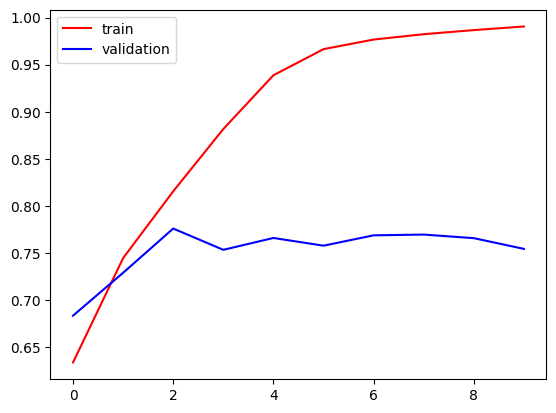

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

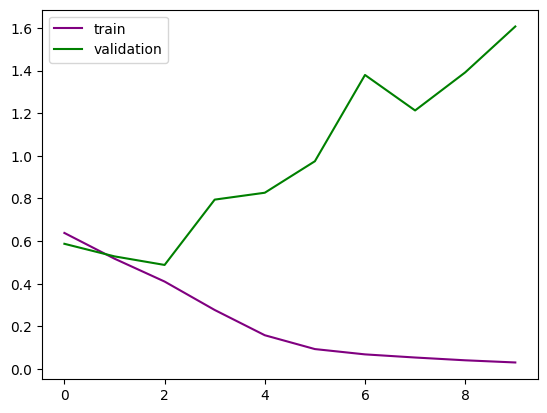

In [ ]:
plt.plot(history.history['loss'],color='purple',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show